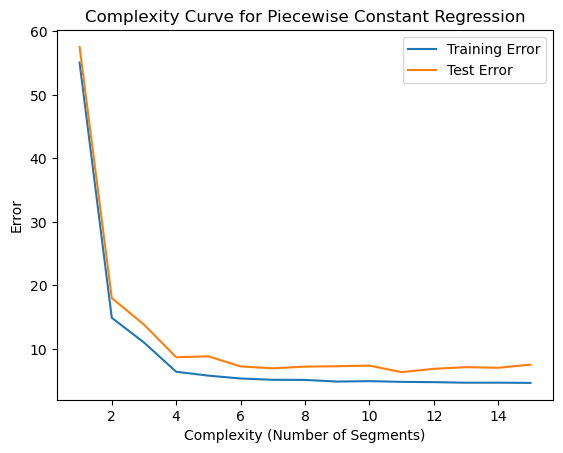

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Generate some random data
np.random.seed(0)
x = np.linspace(-5, 5, 200)
y = 2.5 * x + np.sin(2 * x) + np.random.normal(0, 1, len(x))


# Define the piecewise constant regression class
class PiecewiseConstantRegression(BaseEstimator, TransformerMixin):
    def __init__(self, n_segments):
        self.n_segments = n_segments

    def fit(self, X, y):
        self.segments = np.linspace(X.min(), X.max(), self.n_segments + 1)  # Define the segment intervals
        return self

    def transform(self, X):
        y_pred = np.zeros_like(X)
        for i in range(self.n_segments):
            segment_indices = np.logical_and(X >= self.segments[i], X < self.segments[i + 1])
            y_pred[segment_indices] = i

        return y_pred

# Set the maximum number of segments
max_segments = 15

complexity_values = []
train_errors = []
test_errors = []

for n_segments in range(1, max_segments + 1):
    model = make_pipeline(
        PiecewiseConstantRegression(n_segments),
        LinearRegression()
    )
    model.fit(x[:, np.newaxis], y)

    complexity_values.append(n_segments)

    # Calculate training error
    train_prediction = model.predict(x[:, np.newaxis])
    train_error = np.mean((train_prediction - y) ** 2)
    train_errors.append(train_error)

    # Generate test data
    x_test = np.linspace(-5, 5, 100)
    y_test = 2.5 * x_test + np.sin(2 * x_test) + np.random.normal(0, 1, len(x_test))

    # Calculate test error
    test_prediction = model.predict(x_test[:, np.newaxis])
    test_error = np.mean((test_prediction - y_test) ** 2)
    test_errors.append(test_error)

# Plotting the complexity curve
plt.figure()
plt.plot(complexity_values, train_errors, label='Training Error')
plt.plot(complexity_values, test_errors, label='Test Error')
plt.xlabel('Complexity (Number of Segments)')
plt.ylabel('Error')
plt.title('Complexity Curve for Piecewise Constant Regression')
plt.legend()
plt.show()
